<a href="https://colab.research.google.com/github/vassilyf/ml/blob/main/Lesson_9_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import seaborn as sns

In [3]:
uploaded = files.upload()

Saving heart.csv to heart.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
df.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
#df.isna().sum()
df_enc = pd.get_dummies(df.loc[:,:])
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

<ipython-input-6-8d87271d6960>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


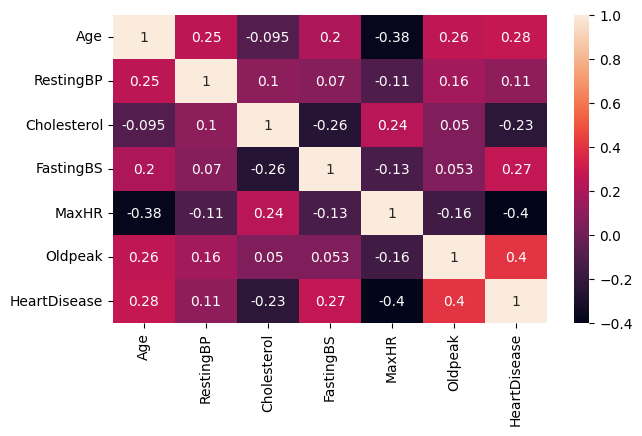

In [6]:
corr = df.corr()
#print(corr_matrix)
plt.figure(figsize=(7,4))
sns.heatmap(corr,annot=True)
plt.show()

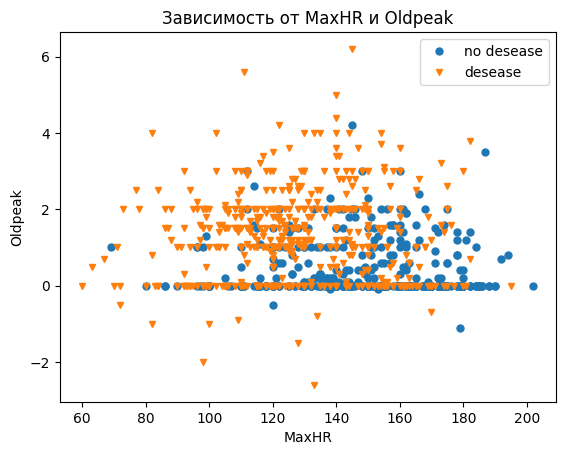

In [7]:
import matplotlib.pyplot as plt

plt.title('Зависимость от MaxHR и Oldpeak')

df0 = df.loc[df['HeartDisease'] == 0]
df1 = df.loc[df['HeartDisease'] == 1]
plt.plot(df0['MaxHR'], df0['Oldpeak'], marker='o', linestyle='', markersize=5, label="no desease")
plt.plot(df1['MaxHR'], df1['Oldpeak'], marker='v', linestyle='', markersize=5, label="desease")


plt.legend()
plt.xlabel('MaxHR')
plt.ylabel('Oldpeak')

plt.show()

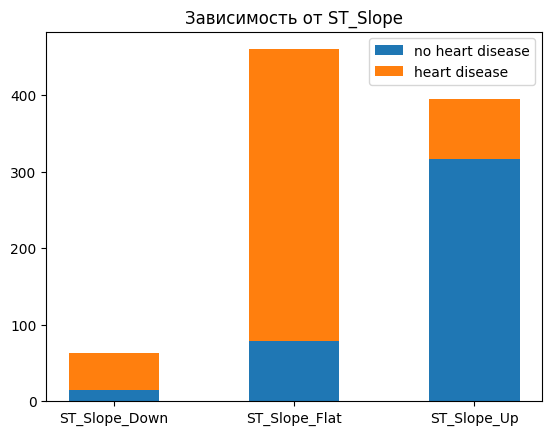

In [8]:
aggr = df_enc.loc[df_enc['HeartDisease'] == 1][['ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']].sum()
aggr0 = df_enc.loc[df_enc['HeartDisease'] == 0][['ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']].sum()
weight_counts = {
    "no heart disease": np.array(aggr0),
    "heart disease": np.array(aggr),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(aggr0.index, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Зависимость от ST_Slope")
ax.legend(loc="upper right")

plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_enc.drop(columns=['HeartDisease']).values, df_enc['HeartDisease'].values, test_size=0.2, random_state=42)


In [40]:
clf1 = DecisionTreeClassifier(random_state=1)
clf1.fit(X_train, y_train)
print(f"{clf1.score(X_train, y_train)} {clf1.score(X_test, y_test)}")
print("\n")
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))


1.0 0.7989130434782609


              precision    recall  f1-score   support

           0       0.73      0.83      0.78        77
           1       0.86      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



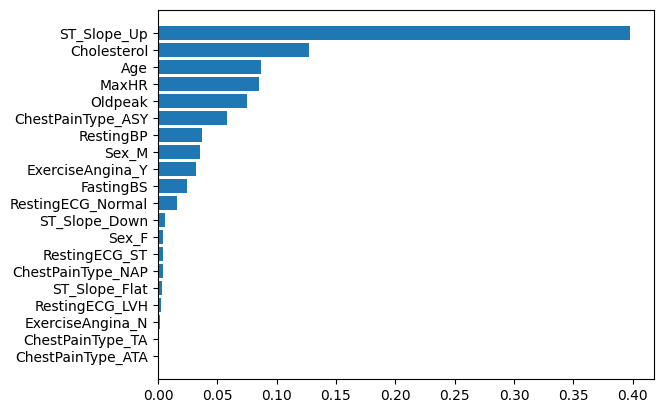

In [41]:
X = df_enc.drop(columns=['HeartDisease'])
df1 = pd.DataFrame({'Importance': clf1.feature_importances_, 'Feature': X.columns})
df2 = df1.sort_values(by=['Importance'], ascending=True)

plt.barh(np.arange(len(df2['Importance'])), df2['Importance'])
plt.yticks(np.arange(len(df2['Feature'])), df2['Feature'])
plt.show()



In [42]:
clf2 = RandomForestClassifier(random_state=1)
clf2.fit(X_train, y_train)
print(f"{clf2.score(X_train, y_train)} {clf2.score(X_test, y_test)}")
print("\n")
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))

1.0 0.8695652173913043


              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



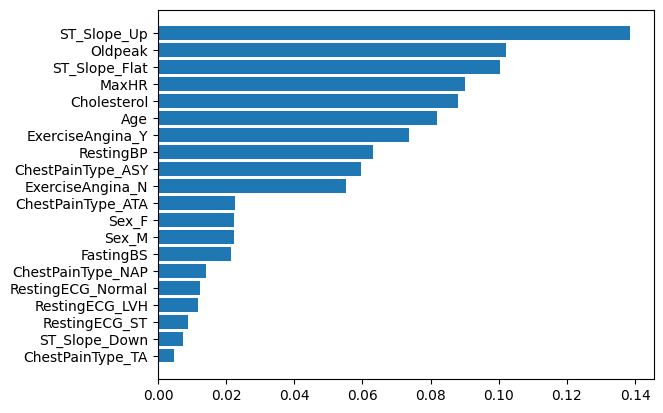

In [43]:
X = df_enc.drop(columns=['HeartDisease'])
df1 = pd.DataFrame({'Importance': clf2.feature_importances_, 'Feature': X.columns})
df2 = df1.sort_values(by=['Importance'], ascending=True)

plt.barh(np.arange(len(df2['Importance'])), df2['Importance'])
plt.yticks(np.arange(len(df2['Feature'])), df2['Feature'])
plt.show()

In [45]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1),
                           n_estimators=10,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        77
           1       0.90      0.78      0.83       107

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.82      0.82       184



In [55]:
lsvc = make_pipeline(
    StandardScaler(),
    LinearSVC(max_iter=10000)
)

stacking = StackingClassifier(
    [
        ('DecisionTree', DecisionTreeClassifier(random_state=1)),
        ('RandomForest', RandomForestClassifier(random_state=1)),
        ('LinearSVC', lsvc)
    ])
stacking.fit(X_train, y_train)
y_pred = stacking.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Выводы:   

1.

| Модель | precision | recall | f1 |
| --- | --- | --- | --- |   
| DecisionTree | 0.86 | 0.78 | 0.82 |   
| FandomForest | 0.9 | 0.88 | 0.89 |   
| Bagging | 0.9 | 0.78 | 0.83 |   
| Stacking | 0.9 | 0.87 | 0.89 |   
| --- | --- | --- | --- |   


лучший показатель у RandomForest. Stacking, несмотря на то, что в нем участвовал RandomForest, слегка ухудшил его результат.

2. Лучшая модель для текущей задачи - RandomForest. Bagging и RF уменьшают разброс базового алгоритма (DecisionTree) и за счет этого показывают лучшую точность. RF позволяет использовать базовые алгоритмы с меньшей коррелацией, по сравнению с более простым подходом в Bagging, поэтому дает лучший результат.

Stacking использует разные типы базовых алгоритмов и за счет усреднения позволяет повысить точность нескольких не очень точных алгоритмов. Но в нашем случае RandomForest дает хороший результат и другие типы алгоритмов его только ухудшают.
